# Task 2: Customer Segmentation Using Unsupervised Learning

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Data cleaning and preprocessing
# remove CustomerID column as it is not useful for clustering
data.drop(columns=['CustomerID'], inplace=True)

In [4]:
# Encode Gender column to numerical values
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

In [5]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.dropna(inplace=True)

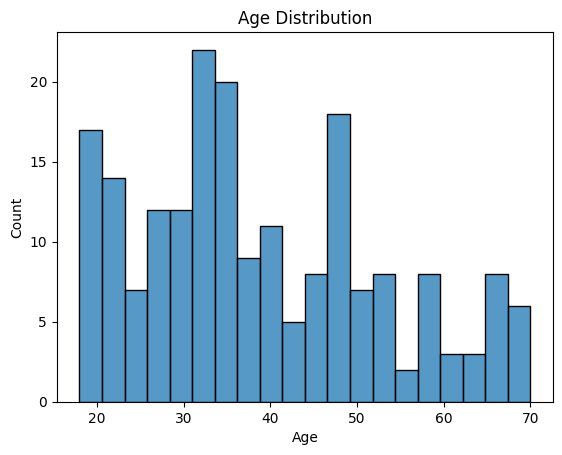

In [9]:
# Distribution of Age
sns.histplot(data['Age'], bins=20)
plt.title("Age Distribution")
plt.show()

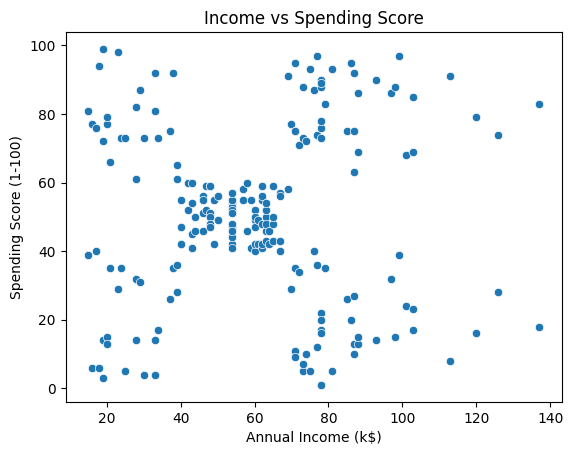

In [ ]:
# Distribution of Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title("Income vs Spending Score")
plt.show()


In [13]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Text(0.5, 1.0, 'Elbow Method')

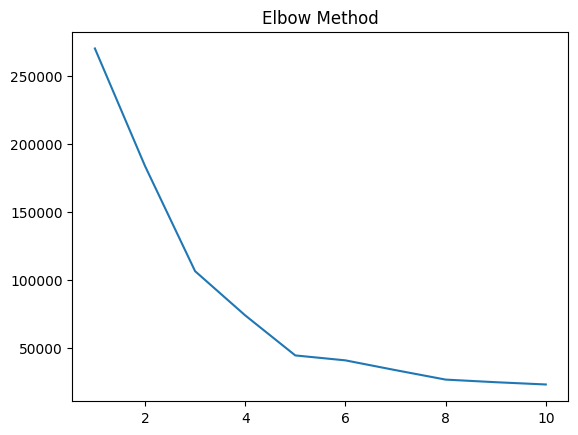

In [16]:
# Elbow method to find optimal number of clusters
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')

In [19]:
# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters


In [22]:
# PCA for Visualization
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

data['PCA1'] = pca_data[:,0]
data['PCA2'] = pca_data[:,1]

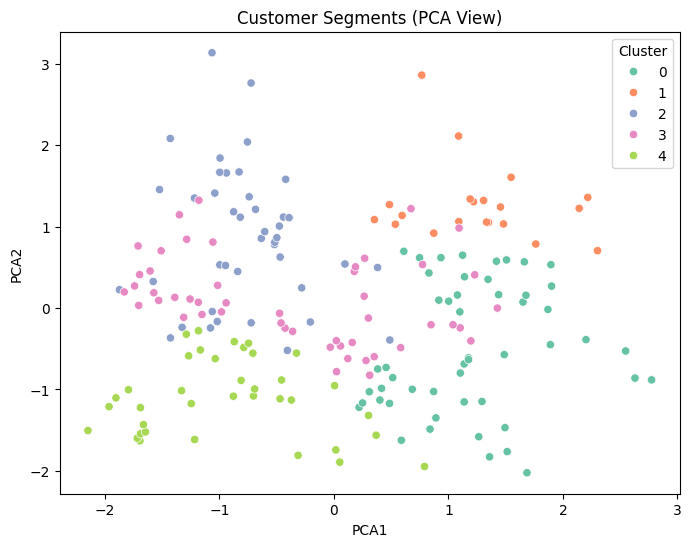

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2')
plt.title("Customer Segments (PCA View)")
plt.show()


In [ ]:
# Cluster Analysis
data.groupby('Cluster').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
Cluster,,,,,,
0,0.490196,56.470588,46.098039,39.313725,1.196512,-0.509010
1,0.000000,39.500000,85.150000,14.050000,1.254732,1.275794
2,0.000000,28.690476,60.904762,70.238095,-0.771673,0.873183
3,1.000000,37.897959,82.122449,54.448980,-0.373001,0.098257
4,1.000000,27.315789,38.842105,56.210526,-0.932353,-1.080123
